# Assignment 10
 Data Wrangling on Real Estate Market

In [44]:
! pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df1=pd.read_csv('Bengaluru_House_Data.csv', encoding='ISO-8859-1')
df2=pd.read_json('sales.json')

In [47]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [48]:
df2.head()

,12 Strong,A Fantastic Woman (Una Mujer Fantástica),All The Money In The World,Bilal: A New Breed Of Hero,Call Me By Your Name,Darkest Hour,Den Of Thieves,Ferdinand,Fifty Shades Freed,Film Stars Don'T Die In Liverpool,...,The 15:17 To Paris,The Commuter,The Disaster Artist,The Greatest Showman,The Insult (L'Insulte),The Post,The Shape Of Water,"Three Billboards Outside Ebbing, Missouri",Till The End Of The World,Winchester
Genre,Action,NaN,NaN,NaN,NaN,NaN,Action,NaN,Drama,NaN,...,Drama,NaN,NaN,Biography,NaN,Biography,Adventure,NaN,NaN,Biography
Gross,"$453,173",NaN,NaN,NaN,NaN,NaN,"$491,898",NaN,unknown,NaN,...,unknown,NaN,NaN,"$627,248",NaN,"$463,228","$448,287",NaN,NaN,"$696,786"
IMDB Metascore,54,NaN,NaN,NaN,NaN,NaN,49,NaN,34,NaN,...,52,NaN,NaN,48,NaN,83,86,NaN,NaN,28
Popcorn Score,72,NaN,NaN,NaN,NaN,NaN,69,NaN,unknown,NaN,...,unknown,NaN,NaN,90,NaN,73,78,NaN,NaN,40
Rating,R,NaN,NaN,NaN,NaN,NaN,R,NaN,unrated,NaN,...,unrated,NaN,NaN,PG,NaN,PG13,R,NaN,NaN,PG13


In [49]:
df1.shape

(13320, 9)

In [50]:
df2.shape

(9, 38)

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [52]:
#Checks for NA values in columns
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [53]:
#for calculating some statistical data like percentile, mean and std of the numeric
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [54]:
#Dropping unnecessary columns
# df1 = df1.drop(['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','TERRITORY'],axis = 1)

In [55]:
df1.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [56]:
#Filling all NA values with mode of the POSTALCODE column
# df1 = df1['POSTALCODE'].fillna(df1.POSTALCODE.mode(), inplace=True)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Genre to tomatoscore
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   12 Strong                                  6 non-null      object
 1   A Fantastic Woman (Una Mujer Fantástica)   3 non-null      object
 2   All The Money In The World                 3 non-null      object
 3   Bilal: A New Breed Of Hero                 3 non-null      object
 4   Call Me By Your Name                       3 non-null      object
 5   Darkest Hour                               3 non-null      object
 6   Den Of Thieves                             6 non-null      object
 7   Ferdinand                                  3 non-null      object
 8   Fifty Shades Freed                         6 non-null      object
 9   Film Stars Don'T Die In Liverpool          3 non-null      object
 10  Forever My Girl                  

In [58]:
df2.isna().sum()

12 Strong                                    3
A Fantastic Woman (Una Mujer Fantástica)     6
All The Money In The World                   6
Bilal: A New Breed Of Hero                   6
Call Me By Your Name                         6
Darkest Hour                                 6
Den Of Thieves                               3
Ferdinand                                    6
Fifty Shades Freed                           3
Film Stars Don'T Die In Liverpool            6
Forever My Girl                              6
Golden Exits                                 3
Hostiles                                     3
I, Tonya                                     6
Insidious: The Last Key                      6
Jumanji: Welcome To The Jungle               3
Mary And The Witch'S Flower                  6
Maze Runner: The Death Cure                  3
Molly'S Game                                 6
Paddington 2                                 3
Padmaavat                                    6
Permission   

In [59]:
# df2 = df2.drop(['ADDRESSLINE1','ADDRESSLINE2','CITY','STATE','TERRITORY'],axis = 1)

In [60]:
df2.describe()

,12 Strong,A Fantastic Woman (Una Mujer Fantástica),All The Money In The World,Bilal: A New Breed Of Hero,Call Me By Your Name,Darkest Hour,Den Of Thieves,Ferdinand,Fifty Shades Freed,Film Stars Don'T Die In Liverpool,...,The 15:17 To Paris,The Commuter,The Disaster Artist,The Greatest Showman,The Insult (L'Insulte),The Post,The Shape Of Water,"Three Billboards Outside Ebbing, Missouri",Till The End Of The World,Winchester
count,6,3,3,3,3,3,6,3,6,3,...,6,3,3,6,3,6,6,3,2,6
unique,6,3,3,3,3,3,6,3,5,3,...,5,3,3,6,3,6,6,3,2,6
top,Action,83,71,91,87,84,Action,49,unknown,69,...,unknown,48,89,Biography,86,Biography,Adventure,87,-1,Biography
freq,1,1,1,1,1,1,1,1,2,1,...,2,1,1,1,1,1,1,1,1,1


In [61]:
df2.isna().sum()

12 Strong                                    3
A Fantastic Woman (Una Mujer Fantástica)     6
All The Money In The World                   6
Bilal: A New Breed Of Hero                   6
Call Me By Your Name                         6
Darkest Hour                                 6
Den Of Thieves                               3
Ferdinand                                    6
Fifty Shades Freed                           3
Film Stars Don'T Die In Liverpool            6
Forever My Girl                              6
Golden Exits                                 3
Hostiles                                     3
I, Tonya                                     6
Insidious: The Last Key                      6
Jumanji: Welcome To The Jungle               3
Mary And The Witch'S Flower                  6
Maze Runner: The Death Cure                  3
Molly'S Game                                 6
Paddington 2                                 3
Padmaavat                                    6
Permission   

In [62]:
import pandas as pd

data_types = df1.dtypes
print(data_types)

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


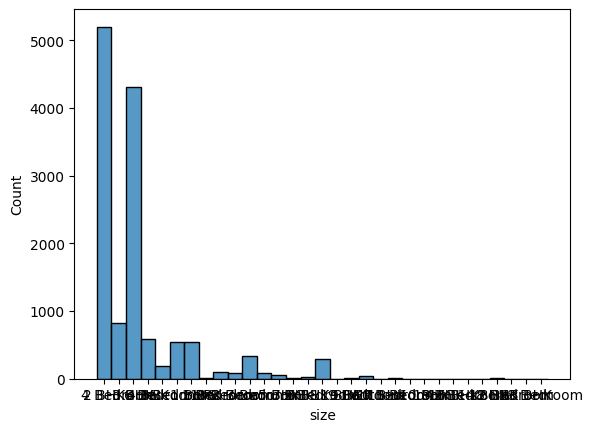

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming your DataFrame is named df1
sns.histplot(x='size', data=df1)
plt.show()

ValueError: Unable to parse string "PG" at position 1

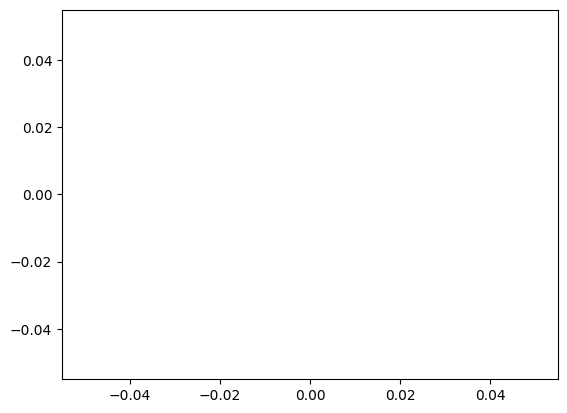

In [70]:
#Plotting histogram plot for STATUS column
# area_type	availability	location	size	society	total_sqft	bath	balcony	price
  
#    Strong	A Fantastic Woman (Una Mujer Fantástica)	All The Money In The World	Bilal: A New Breed Of Hero	Call Me By Your Name	Darkest Hour	Den Of Thieves	Ferdinand	Fifty Shades Freed	Film Stars Don'T Die In Liverpool	...	The 15:17 To Paris	The Commuter	The Disaster Artist	The Greatest Showman	The Insult (L'Insulte)	The Post	The Shape Of Water	Three Billboards Outside Ebbing, Missouri	Till The End Of The World	Winchester
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Ferdinand', data=df2, )
plt.show()

In [ ]:
#Plotting histogram plot for MONTH_ID column
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='MONTH_ID', data=df1, )
plt.show()

In [ ]:
#Plotting histogram plot for MONTH_ID column
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='MONTH_ID', data=df2, )
plt.show()

In [ ]:
#Plotting boxplot for STATUS column against MONTH_ID column
sns.boxplot( x="STATUS", y= "MONTH_ID", data=df1, )
plt.show()

In [ ]:
#Plotting boxplot for STATUS column against MONTH_ID column
sns.boxplot( x="STATUS", y= "MONTH_ID", data=df2, )
plt.show()

In [ ]:
#Plotting Scatterplot
sns.scatterplot( x="STATUS", y="MONTH_ID", data=df1,
hue='COUNTRY', size='YEAR_ID')
# Placing Legend outside the Figure

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [ ]:
#Plotting Scatterplot
sns.scatterplot( x="STATUS", y="MONTH_ID", data=df2,
hue='COUNTRY', size='YEAR_ID')
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [ ]:
#Checking the data only for shipped STATUS
data1=df1[df1["STATUS"]=='Shipped']
data1.head()

In [ ]:
#Checking the data only for shipped STATUS
data2=df2[df2["STATUS"]=='Shipped']
data2.head()

In [ ]:
data1.shape

In [ ]:
data2.shape

In [ ]:
#Calculating sum for sales column
sum_sales = df1['SALES'].sum()
print("Addition of all sales",sum_sales)

In [ ]:
#Calculating sum for sales column
sum_sales = df2['SALES'].sum()
print("Addition of all sales",sum_sales)

In [ ]:
#Calulating average for sales column
sales_avg = df1['SALES'].mean()
print("Average of total sales = ",sales_avg)

In [ ]:
#Calulating average for sales column
sales_avg = df2['SALES'].mean()
print("Average of total sales = ",sales_avg)

In [ ]:
import sklearn
import pandas as pd
import seaborn as sns
# IQR
Q1 = np.percentile(df1['SALES'], 25,

interpolation = 'midpoint')

Q3 = np.percentile(df1['SALES'], 75,

interpolation = 'midpoint')

IQR = Q3 - Q1
print("Old Shape: ", df1.shape)
# Upper bound
upper = np.where(df1['SALES'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df1['SALES'] <= (Q1-1.5*IQR))
# Removing the Outliers
df1.drop(upper[0], inplace = True)
df1.drop(lower[0], inplace = True)
print("New Shape: ", df1.shape)
sns.boxplot(x='SALES', data=df1)

In [ ]:
import sklearn
import pandas as pd
import seaborn as sns
# IQR
Q1 = np.percentile(df2['SALES'], 25,

interpolation = 'midpoint')

Q3 = np.percentile(df2['SALES'], 75,

interpolation = 'midpoint')

IQR = Q3 - Q1
print("Old Shape: ", df2.shape)
# Upper bound
upper = np.where(df2['SALES'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df2['SALES'] <= (Q1-1.5*IQR))
# Removing the Outliers
df2.drop(upper[0], inplace = True)
df2.drop(lower[0], inplace = True)
print("New Shape: ", df2.shape)
sns.boxplot(x='SALES', data=df2)